In [1]:
%load_ext autoreload
%autoreload 2
from bench_result import *

to_csv
/home/aoli/repos/sfuzz-benchmark/output/test/sctbench/random
to_csv
/home/aoli/repos/sfuzz-benchmark/output/test/sctbench/jpf
to_csv
/home/aoli/repos/sfuzz-benchmark/output/test/sctbench/rr


<Axes: xlabel='time', ylabel='Count'>

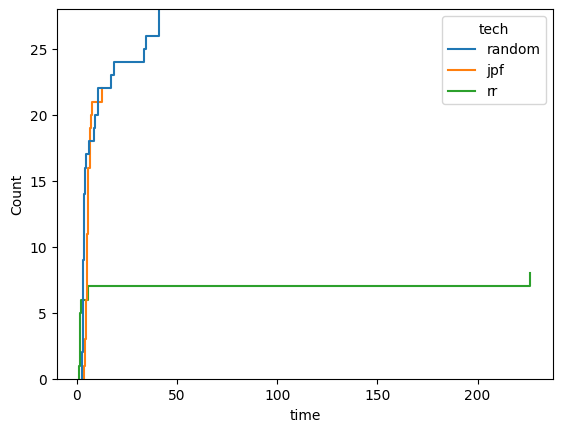

In [5]:
suite = BenchmarkSuite("/home/aoli/repos/sfuzz-benchmark/output/test/sctbench")
suite.to_aggregated_fig()

to_csv
/home/aoli/repos/sfuzz-benchmark/output/test/jacontebe/random
to_csv
/home/aoli/repos/sfuzz-benchmark/output/test/jacontebe/jpf
to_csv
/home/aoli/repos/sfuzz-benchmark/output/test/jacontebe/rr


<Axes: xlabel='time', ylabel='Count'>

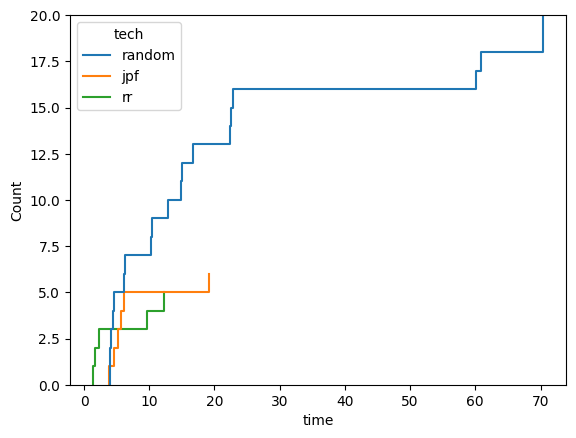

In [3]:
suite = BenchmarkSuite("/home/aoli/repos/sfuzz-benchmark/output/test/jacontebe")
suite.to_aggregated_fig()